# Task 3: Legendary Pokemon Classification using Logistic Regression and Single-hidden-layer Neural Networks

In this task, you will build a logistic regression model as well as neural network classifiers to predict whether a Pokemon is legendary or not. You should use the following 10 features for your models: ‘Type 1’, ‘Type 2’, ‘HP’, ‘Attack’, ‘Defense’, ‘Sp. Atk’, ‘Sp. Def’, ‘Speed’, ‘Generation’, and ‘Has Gender’. One-hot encoding may be used for the categorical features.

You are also required to use the train test split submodule in scikit-learn to split the data, with 80% for training and 20% for validation. As before, we ask that you set random state = 4211 for reproducibility.

# Task 3.1: Logistic_regression

Learning of the logistic regression model should use a gradient-descent algorithm by minimizing the cross-entropy loss. It requires that the step size parameter η be specified. Try out a few values (<1) and choose one that leads to stable convergence. You may also decrease η gradually during the learning process to enhance convergence. This can be done automatically in ```scikit-learn``` when set properly.

During training, record the training time for the logistic model. After training, you are required to evaluate your model using both accuracy and the F1 score on the validation set.

In [1]:
# import library
import pandas as pd
import numpy as np
import time
import math
import matplotlib.pyplot as plt

from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.model_selection import train_test_split

from sklearn import preprocessing

In [2]:
# import csv
pkdf = pd.read_csv('./pokemon.csv', sep=',', index_col="#")

In [3]:
# get the dfs first
logistic_labels = [
    'Type 1', 'Type 2', 'HP', 
    'Attack', 'Defense', 
    'Sp. Atk', 'Sp. Def', 
    'Speed', 'Generation', 'Has Gender'
]
X = pkdf[logistic_labels]
y = pkdf['Legendary']

In [4]:
# preprocess
X = pd.get_dummies(X)

In [5]:
# normal distribute the data, to make the loss later decrease

normal_labels = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
for l in normal_labels:
    X[l] = preprocessing.scale(X[l])

In [6]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=4211
)

In [7]:
# factorize the function out for further testing
def logistic(rate):
    # start counting time
    start = time.time()
    
    # define logistic training model
    model = SGDClassifier(
        loss = 'log',
        max_iter = 500, # to prevent overtime
        random_state = rate
    )
    model.fit(X_train, y_train)
    
    # make prediction
    pred = model.predict(X_test)
    
    # mark down the time used
    used = time.time() - start
    
    # score
    acc = accuracy_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    
    return (used, acc, f1)

In [8]:
# do logistic regression here
random_states = [0, 1, 4, 9, 16, 25, 36, 4211]
stats = []
for r in random_states:
    t, a, f = logistic(r)
    stats.append( (r, t, a, f) )

In [9]:
def printf (test):
    print ('Random state:', test[0] )
    print ('Time used:', test[1] )
    print ('Accuracy:', test[2] )
    print ('F1 score:', test[3] )
    print ("")

In [10]:
for stat in stats:
    printf(stat)

Random state: 0
Time used: 0.005660295486450195
Accuracy: 0.925
F1 score: 0.45454545454545453

Random state: 1
Time used: 0.0056569576263427734
Accuracy: 0.95625
F1 score: 0.7741935483870968

Random state: 4
Time used: 0.006000041961669922
Accuracy: 0.95
F1 score: 0.7647058823529412

Random state: 9
Time used: 0.005624055862426758
Accuracy: 0.9375
F1 score: 0.6428571428571428

Random state: 16
Time used: 0.004586935043334961
Accuracy: 0.9375
F1 score: 0.6153846153846153

Random state: 25
Time used: 0.005586862564086914
Accuracy: 0.95625
F1 score: 0.7741935483870968

Random state: 36
Time used: 0.005527019500732422
Accuracy: 0.9625
F1 score: 0.8125

Random state: 4211
Time used: 0.005464076995849609
Accuracy: 0.95
F1 score: 0.7142857142857143



In [11]:
print('Mean Time:', np.mean([x[1] for x in stats]))
print('SD Time :', math.sqrt(np.var([x[1] for x in stats])))
print('Mean Accuracy:', np.mean([x[2] for x in stats]))
print('SD Accuracy:', math.sqrt(np.var([x[2] for x in stats])))
print('Mean F1:', np.mean([x[3] for x in stats]))
print('SD F1:', math.sqrt(np.var([x[3] for x in stats])))

Mean Time: 0.005513280630111694
SD Time : 0.00038039525407196605
Mean Accuracy: 0.946875
SD Accuracy: 0.011692679333668564
Mean F1: 0.6940832382750077
SD F1: 0.11093324955470744


# Task 3.2: Single-hidden-layer Neural Networks

Neural network classifiers generalize logistic regression by introducing one or more hidden layers. The learning algorithm for them is similar to that for logistic regression as described above.
1The F1 score is the harmonic mean of precision and sensitivity. You can find this metric in sklearn.metrics.

For the single-hidden-layer neural network model, you need to try different number of hidden units H ∈ {1, 2, 4, 8, 16, 32, 64}. The hyperparameter ```max_iter``` can be set to 500 (default is 200). The other hyperparameters may just take their default values. During training, you are expected to record the training time of the models. After training, evaluate your models using the accuracy and the F1 score on the validation set. You have to report the accuracy and the F1 score for *each value* of H by plotting them using ```matplotlib```.

In [12]:
# import more libraries
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

In [13]:
# as the dataset already split before, so directly use
def neural_train(hs):
    
    start = time.time()

    # train and define the model
    nn = MLPClassifier(
        hidden_layer_sizes=hs,
        max_iter=500,
    )
    nn.fit(X_train, y_train)
    
    # train time ends
    used = time.time() - start
    
    # make prediction
    pred = nn.predict(X_test)
    
    # score
    acc = accuracy_score(y_test, pred)
    f1 = f1_score(y_test, pred, average='macro')
    
    return (used, acc, f1)

In [14]:
# use the same randome states as the logistic
hss = [(2**i, ) for i in range(1, 8)] # h values required
ts = []
acs = []
fs = []
for h in hss:
    t, a, f = neural_train(h)
    ts.append(t)
    acs.append(a)
    fs.append(f)

In [15]:
print ('Mean train time:' , np.mean(ts))
print ('SD:', math.sqrt(np.var(ts)) )
print ('Mean accuracy:' , np.mean(acs))
print ('SD:', math.sqrt(np.var(acs)) )
print ('Mean f1 score:' , np.mean(fs))
print ('SD:', math.sqrt(np.var(fs)) )

Mean train time: 0.5077272823878697
SD: 0.07404545724457166
Mean accuracy: 0.9705357142857143
SD: 0.009278843611976095
Mean f1 score: 0.9138067694724458
SD: 0.03102633546197816


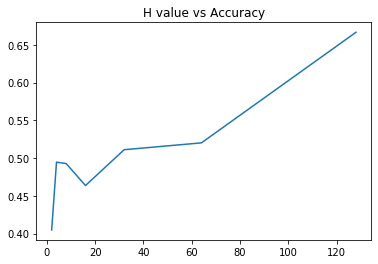

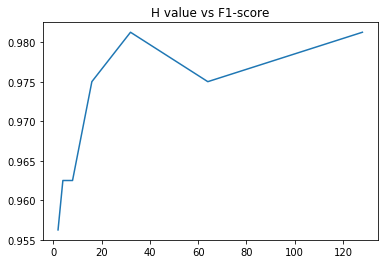

In [16]:
# plot accuracy graph and f1 graph
title = [
    'Accuracy',
    'F1-score'
]
for i,y in enumerate([ts, acs]):
    plt.title('H value vs ' + title[i] )
    plt.plot(hss, y)
    plt.show()

In [17]:
print (ts[-1], acs[-1], fs[-1])

0.6667740345001221 0.98125 0.9464225918071213
